## (미니 배치) 확률적 경사 하강법

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 실제값을 Y=8X+2 시뮬레이션하는 데이터 값 생성
* np.random.seed(0)
* 0과 1사이의 600개의 랜덤 값을 지정한다.
* X, y의 scatter plot으로 시각화 한다.

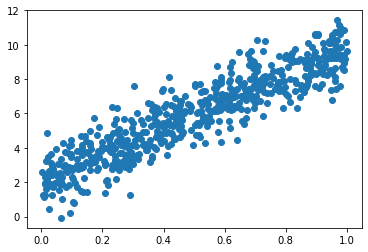

In [3]:
np.random.seed(0)
X = np.random.rand(600,1)
y = 2 + 8*X + np.random.randn(600,1)

plt.scatter(X,y)

### w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성.
* def get_weight_updates(w1, w0, X, y, learning_rate=0.01):

In [4]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

### 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [5]:
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

### 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [6]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
        
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:6.389 w0:2.807
Gradient Descent Total Cost:1.1243


### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
* def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 6.391 w0: 2.862
Stochastic Gradient Descent Total Cost:1.1323


# 영화 관객수 예측 모델

movies_data.csv 파일이 존재합니다.

영화에 관련된 여러가지 피처들을 통해 관객수를 예측해내는 것이 목표입니다.

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

데이터셋 출처: https://dacon.io/competitions/open/235536/data

(학습을 위해 원래 데이터셋에서 test.csv는 제외하고, train.csv 파일만을 고려하여 진행했습니다.)

In [9]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#데이터셋 불러오기
movie = pd.read_csv('D:/Downloads/2022-1-Euron-DA-Week_5/2022-1-Euron-DA-Week_5/Week5_복습과제_데이터.csv')

## 데이터 전처리, EDA 및 시각화

### wine_data 데이터를 살펴보고, 분석에 쓸모 없을 것 같은 column을 삭제하시오.
title, distributor, release_time, director 열 삭제

In [11]:
movie.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [12]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [13]:
movie.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [14]:
movie=movie.drop(['title', 'distributor', 'release_time', 'director'],axis=1, inplace=False)

In [15]:
movie.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,액션,96,청소년 관람불가,NaN,0,91,2,23398
1,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501
2,액션,123,15세 관람가,220775.25,4,343,4,6959083
3,코미디,101,전체 관람가,23894.00,2,20,6,217866
4,코미디,108,15세 관람가,1.00,1,251,2,483387


### movie 데이터에서 결측치가 있는지 확인하고, 그 결측치를 0으로 채우시오.
dir_prev_bfnum의 변수 설명에서 관객수가 알려지지 않은 영화는 제외한다고 했으므로 단순하게 0으로 결측치 처리

In [16]:
movie.info() #결측치 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   time            600 non-null    int64  
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  270 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 37.6+ KB


In [17]:
movie['dir_prev_bfnum'] = movie['dir_prev_bfnum'].fillna(0)

In [18]:
#결측치가 잘 채워졌는지 확인
movie.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   time            600 non-null    int64  
 2   screening_rat   600 non-null    object 
 3   dir_prev_bfnum  600 non-null    float64
 4   dir_prev_num    600 non-null    int64  
 5   num_staff       600 non-null    int64  
 6   num_actor       600 non-null    int64  
 7   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 37.6+ KB


### 수치형 column들의 분포도를 히스토그램을 통해 시각적으로 살펴보고, 분포가 왜곡되어 있는 column이 있는지 판단하시오.

D:\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

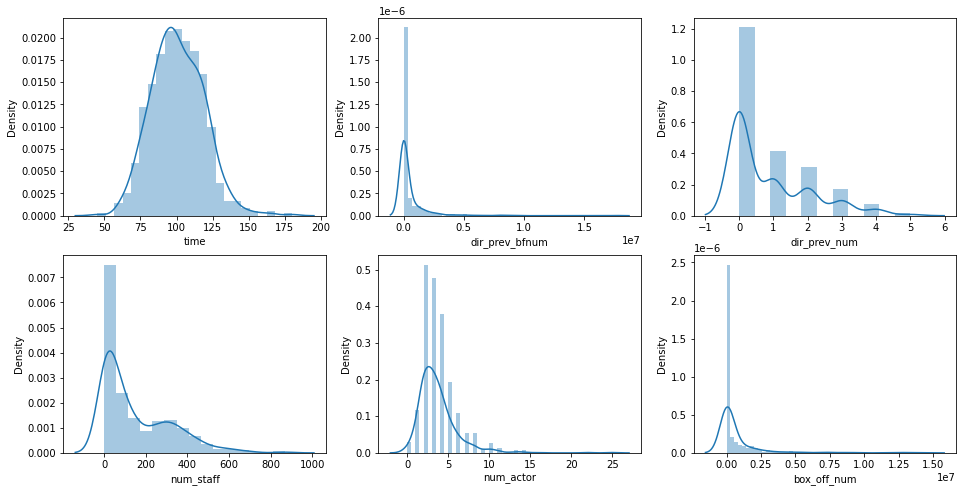

In [20]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=3 , nrows=2)
lm_features = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor','box_off_num']
for i , feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    sns.distplot(movie[feature] , ax=axs[row][col])

### 위 문제에서 보았듯이, 타겟 변수인 box_off_num의 분포가 한 쪽으로 치우쳐져 있다. 타겟 변수에 대해 적절한 transformation을 적용하시오.

In [21]:
movie['box_off_num']=np.log1p(movie['box_off_num'])

-> box_off_num(타겟 변수), dir_prev_bfnum, num_actor, num_staff의 분포가 왜곡되어 보임 (후에 파이프라인에서 스케일링 작업 할 것)

D:\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='box_off_num', ylabel='Density'>

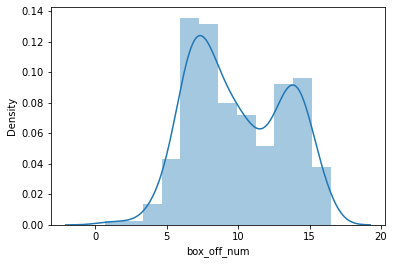

In [92]:
#잘 transfromation 되었는지 확인
sns.distplot(movie['box_off_num'])

## Linear Regression OLS로 학습/예측/평가 수행
* x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
* mse, rmse, r2_score을 출력
* 선형 회귀에 사용하는 설명 변수: ['time', 'dir_prev_bfnum', 'num_staff']

In [28]:
movie[['time', 'dir_prev_bfnum', 'num_staff']]

,time,dir_prev_bfnum,num_staff
0,96,0.00,91
1,130,1161602.50,387
2,123,220775.25,343
3,101,23894.00,20
4,108,1.00,251
...,...,...,...
595,111,3833.00,510
596,127,496061.00,286
597,99,0.00,123
598,102,0.00,431


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = movie['box_off_num']
X_data = movie[['time', 'dir_prev_bfnum', 'num_staff']]

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2)

lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 4.909 , RMSE : 2.216
Variance score : 0.565


### * 위에서 구한 모델의 절편과 회귀계수를 출력
* 회귀 계수는 round 하지 않고 그대로 출력한다.

In [40]:
print('coef: ',lr.coef_)
print('intercept: ',lr.intercept_)

coef:  [4.20488874e-02 1.93767587e-08 1.18646425e-02]
intercept:  3.925567866071395


### * cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구한다.

In [43]:
from sklearn.model_selection import cross_val_score

y_target = movie['box_off_num']
X_data = movie[['time', 'dir_prev_bfnum', 'num_staff']]

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
mse_scores=-1 * neg_mse_scores
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
print(mse_scores, rmse_scores)

[4.12418767 4.71031305 4.65894555 5.17139123 4.57843921] [2.03080961 2.17032556 2.15845907 2.27406931 2.13972877]


### numerical과 categorical로 구분하여 저장한 후, 수치형 변수와 범주형 변수를 확인한다.

In [46]:
numerical = movie.select_dtypes('number').columns
categorical = movie.select_dtypes('object').columns
print('numerical', numerical)
print('categorical', categorical)

numerical Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num'],
      dtype='object')
categorical Index(['genre', 'screening_rat'], dtype='object')


### 위에서 지정한 numerical 변수 간의 상관관계를 heatmap을 통해 표현한다.

<AxesSubplot:>

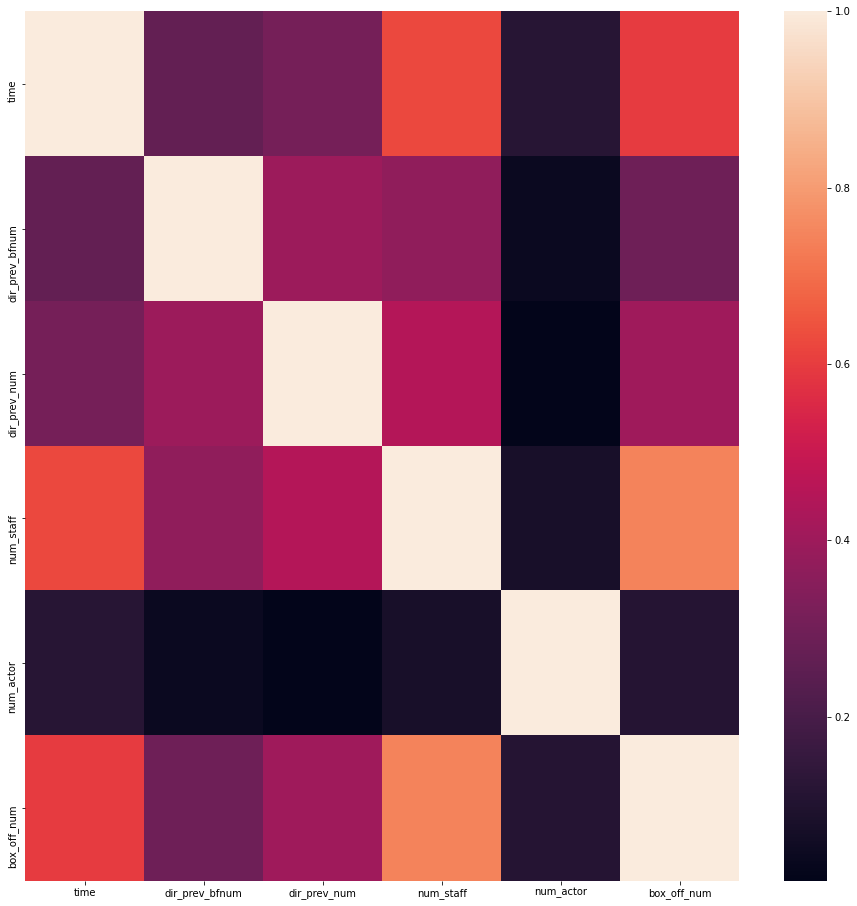

In [47]:
plt.figure(figsize=(16,16))
corr=movie[numerical].corr()
sns.heatmap(corr)

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_movie, y_movie으로 저장하시오. (target은 box_off_num)

In [48]:
y_movie = movie['box_off_num']
X_movie = movie.drop(['box_off_num'], axis=1, inplace=False)

In [49]:
#데이터 확인 (X_movie)
X_movie

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,액션,96,청소년 관람불가,0.00,0,91,2
1,느와르,130,청소년 관람불가,1161602.50,2,387,3
2,액션,123,15세 관람가,220775.25,4,343,4
3,코미디,101,전체 관람가,23894.00,2,20,6
4,코미디,108,15세 관람가,1.00,1,251,2
...,...,...,...,...,...,...,...
595,드라마,111,청소년 관람불가,3833.00,1,510,7
596,드라마,127,15세 관람가,496061.00,1,286,6
597,공포,99,청소년 관람불가,0.00,0,123,4
598,느와르,102,15세 관람가,0.00,0,431,4


In [50]:
#데이터 확인(y_movie)
y_movie

0      10.060449
1      15.771725
2      15.755558
3      12.291640
4      13.088575
         ...    
595    14.204231
596    14.355762
597     7.814400
598    14.600565
599    15.784933
Name: box_off_num, Length: 600, dtype: float64

### 피쳐값 중 카테고리 변수가 2가지 있다. 2개의 카테고리 변수가 어떤 값을 갖고 있는지 파악하시오. 이에 대해 Encoding을 진행하고 각각 어떻게 Encoding 되었는지 설명하시오. (LabelEncoder 사용)
ex) 드라마 4, 청불 3, ...

In [51]:
movie[categorical].describe()

,genre,screening_rat
count,600,600
unique,12,4
top,드라마,청소년 관람불가
freq,221,204


In [53]:
#genre, screening_rat 피쳐에 대해 Encoding 진행
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
result1 = le.fit_transform(movie['genre'])
result2 = le.fit_transform(movie['screening_rat'])

In [55]:
movie['genre'] = result1
movie['screening_rat'] = result2

In [56]:
#Encoding이 잘 되었는지 확인
movie

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,10,96,3,0.00,0,91,2,10.060449
1,2,130,3,1161602.50,2,387,3,15.771725
2,10,123,1,220775.25,4,343,4,15.755558
3,11,101,2,23894.00,2,20,6,12.291640
4,11,108,1,1.00,1,251,2,13.088575
...,...,...,...,...,...,...,...,...
595,4,111,3,3833.00,1,510,7,14.204231
596,4,127,1,496061.00,1,286,6,14.355762
597,1,99,3,0.00,0,123,4,7.814400
598,2,102,1,0.00,0,431,4,14.600565


### train_test_split()을 이용해 train set와 test set를 분리하시오.
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 123

In [61]:
y_target = movie['box_off_num']
X_data = movie.drop('box_off_num',axis=1, inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2, random_state = 123)


In [62]:
#잘 분리되었는지 확인
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 442 to 510
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           480 non-null    int32  
 1   time            480 non-null    int64  
 2   screening_rat   480 non-null    int32  
 3   dir_prev_bfnum  480 non-null    float64
 4   dir_prev_num    480 non-null    int64  
 5   num_staff       480 non-null    int64  
 6   num_actor       480 non-null    int64  
dtypes: float64(1), int32(2), int64(4)
memory usage: 26.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 367 to 376
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           120 non-null    int32  
 1   time            120 non-null    int64  
 2   screening_rat   120 non-null    int32  
 3   dir_prev_bfnum  120 non-null    float64
 4   dir_prev_num    120 non-null    int64  
 5   nu

## 선형 규제 모델 사용해보기

### 릿지
- 릿지 회귀를 적용하여 5개 폴드의 개별 RMSE와 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, alpha=10

In [70]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

y_target = movie['box_off_num']
X_data = movie.drop('box_off_num',axis=1, inplace=False)


ridge = Ridge(alpha = 10, random_state=123)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 RMSE scores :  [2.12  2.157 2.073 2.184 2.094]
 5 folds 의 평균 RMSE : 2.126 


- 알파 값을 변화시켜가며 릿지를 수행하시오.
- alphas = [0 , 0.1 , 1 , 10 , 100]

In [71]:
alphas = [0 , 0.1 , 1 , 10 , 100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha, random_state=123)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 2.126 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 2.126 
alpha 1 일 때 5 folds 의 평균 RMSE : 2.126 
alpha 10 일 때 5 folds 의 평균 RMSE : 2.126 
alpha 100 일 때 5 folds 의 평균 RMSE : 2.124 


- 위의 알파 값에 따른 피처별 회귀계수를 시각화하시오.

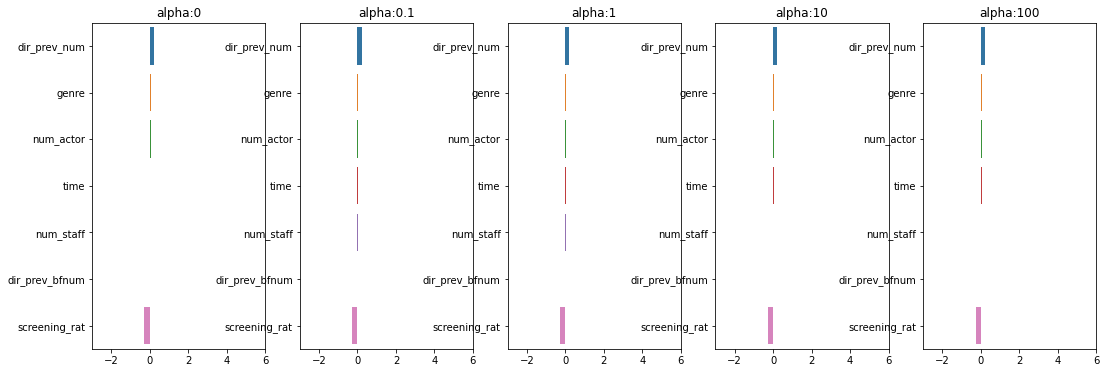

In [72]:
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

coeff_df = pd.DataFrame()

for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target) 
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

- 알파 값에 따른 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오.

In [67]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
dir_prev_num,2.160634e-01,2.160306e-01,2.157357e-01,2.128311e-01,1.875993e-01
genre,4.951502e-02,4.951441e-02,4.950886e-02,4.945307e-02,4.887130e-02
num_actor,4.634393e-02,4.634272e-02,4.633189e-02,4.622398e-02,4.518251e-02
time,3.825985e-02,3.825998e-02,3.826112e-02,3.827236e-02,3.836886e-02
num_staff,1.120740e-02,1.120752e-02,1.120860e-02,1.121924e-02,1.131268e-02
dir_prev_bfnum,-3.245587e-08,-3.244754e-08,-3.237272e-08,-3.163539e-08,-2.520886e-08
screening_rat,-2.772074e-01,-2.771708e-01,-2.768418e-01,-2.735943e-01,-2.448568e-01


### 라쏘
- get_linear_reg_eval 함수에 라쏘 회귀를 적용하여 5개 폴드의 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]

In [87]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

y_target = movie['box_off_num']
X_data = movie.drop('box_off_num',axis=1, inplace=False)

lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
for lasso_alphas in lasso_alphas :
    lasso = Lasso(alpha = lasso_alphas, random_state=123)
    
    neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(lasso_alphas,avg_rmse))

alpha 0.07 일 때 5 folds 의 평균 RMSE : 2.130 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 2.133 
alpha 0.5 일 때 5 folds 의 평균 RMSE : 2.155 
alpha 1 일 때 5 folds 의 평균 RMSE : 2.156 
alpha 3 일 때 5 folds 의 평균 RMSE : 2.165 


- 위의 알파 값에 따른 피처별 회귀계수를 시각화하시오.

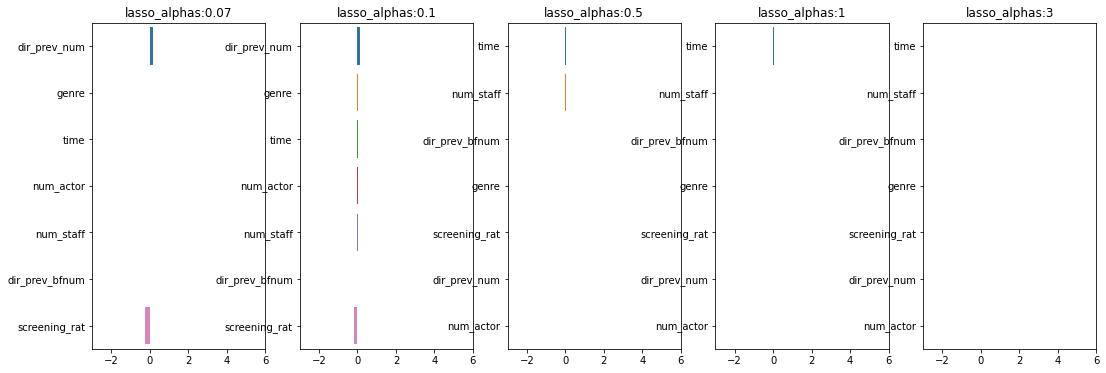

In [91]:
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

coeff_df = pd.DataFrame()

lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]

for pos , lasso_alphas in enumerate(lasso_alphas) :
    lasso = Lasso(alpha = lasso_alphas, random_state=123)
    lasso.fit(X_data , y_target) 
    coeff = pd.Series(data=lasso.coef_ , index=X_data.columns )
    colname='lasso_alphas:'+str(lasso_alphas)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

### 엘라스틱 넷
- get_linear_reg_eval 함수에 엘라스틱 넷을 적용하여 5개 폴드의 평균 RMSE 점수를 구하시오. 
- random_state=123
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개, elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]

In [93]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

y_target = movie['box_off_num']
X_data = movie.drop('box_off_num',axis=1, inplace=False)

elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]

for elastic_alphas in elastic_alphas :
    elastic = ElasticNet(alpha = elastic_alphas, random_state=123)
    
    neg_mse_scores = cross_val_score(elastic, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(elastic_alphas,avg_rmse))

alpha 0.07 일 때 5 folds 의 평균 RMSE : 2.127 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 2.128 
alpha 0.5 일 때 5 folds 의 평균 RMSE : 2.148 
alpha 1 일 때 5 folds 의 평균 RMSE : 2.155 
alpha 3 일 때 5 folds 의 평균 RMSE : 2.158 


- 알파 값에 따르 피처별 회귀 계수 값을 데이터프레임 형태로 나타내시오. 

## 회귀 트리와 스태킹 앙상블
### 개별 회귀 트리 모델과 스태킹 회귀 모델의 성능을 비교하시오.
- 개별 회귀 트리 모델: DecisionTreeRegressor(random_state=123)
- 스태킹 앙상블에서의 base model : Ridge(alpha=8), Lasso(alpha=0.001), XGBRegressor(n_estimators=1000, learning_rate=0.05), LGBMRegressor(n_estimators=1000, learning_rate=0.05)
- 스태킹 앙상블에서의 최종 메타 model : Ridge(alpha=0.1)
- 성능 지표는 RMSE로 판단
- 폴드 개수는 5개

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np


rf = RandomForestRegressor(random_state=123, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_movie, y_movie, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [nan nan nan nan nan]
 5 교차 검증의 개별 RMSE scores :  [nan nan nan nan nan]
 5 교차 검증의 평균 RMSE : nan 


D:\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Downloads\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Downloads\anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "D:\Downloads\anaconda\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\Downloads\anaconda\lib\site-packages\sklearn

## 선형 회귀 모델과 파이프라인(Pipeline) 설계
전처리 문제 3번에서 보았듯이, 특정 변수들의 분포도가 치우쳐져 있다. 이를 위해 전처리를 하고 GridSearchCV를 하기 위해선 Pipeline을 설계해야 한다.

### 피처 변수들에 대해 Standard scaling을 하는 전처리 단계와 ElasticNet 모델을 포함하는 Pipeline을 설계하시오.
- ElasticNet 모델의 파라미터: alpha=0.1, l1_ratio=0.7

### 피처 변수들에 대해 Standard scaling을 하는 전처리 단계와 ElasticNet 모델을 포함하는 Pipeline을 설계하고, 테스트 세트에 대한 R2 score를 도출하시오.
- ElasticNet 모델의 파라미터: alpha=0.1, l1_ratio=0.7, random_state=123

### 파이프라인은 전처리 단계와 함께 GridSearchCV를 할 때 유용하게 사용된다. 앞서 만든 pipe를 토대로 GridSearchCV를 수행하고, 최적의 하이퍼 파라미터와 RMSE를 도출하시오.
- alpha : [0.1, 0.01, 0.05, 0.07]
- l1_ratio : [0, 0.5, 0.7, 0.8, 1]
- max_iter : [10,50,70,100,1000,2000]
- cv = 5, n_jobs=-1